In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import csv
import os
from pathlib import Path

In [2]:
coffee_qlty_df = pd.read_csv("Coffee_qlty.csv")
coffee_statistics_df = pd.read_csv("Stats_coffee.csv")
population_df = pd.read_csv("Population.csv")
coffee_qlty_df.head(20)

,Country.of.Origin,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51
5,Cote dIvoire,7.420000,7.250000,6.830000,7.000000,7.330000,7.080000,9.330000,10.000000,10.000000,0.130000,0.000000,1.000000,2.000000,1
6,Ecuador,7.583333,7.640000,7.553333,7.693333,6.026667,6.970000,10.000000,10.000000,8.723333,0.030000,0.000000,0.000000,0.333333,3
7,El Salvador,7.674762,7.654286,7.567143,7.590476,7.606667,7.711429,9.936190,9.936190,9.808571,0.045714,0.095238,0.142857,3.571429,21
8,Ethiopia,7.896364,8.009091,7.893864,8.043636,7.924091,7.972273,9.878409,9.954318,9.863409,0.082955,0.363636,0.250000,5.159091,44
9,Guatemala,7.544862,7.489006,7.266851,7.596409,7.475746,7.469890,9.852486,9.889337,9.870884,0.102265,0.276243,0.187845,3.419890,181


In [3]:
coffee_qlty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country.of.Origin         34 non-null     object 
 1   AVG_Aroma                 34 non-null     float64
 2   AVG_Flavor                34 non-null     float64
 3   AVG_Aftertaste            34 non-null     float64
 4   AVG_Acidity               34 non-null     float64
 5   AVG_Body                  34 non-null     float64
 6   AVG_Balance               34 non-null     float64
 7   AVG_Uniformity            34 non-null     float64
 8   AVG_Clean.Cup             34 non-null     float64
 9   AVG_Sweetness             34 non-null     float64
 10  AVG_Moisture              34 non-null     float64
 11  AVG_Quakers               34 non-null     float64
 12  AVG_Category.One.Defects  34 non-null     float64
 13  AVG_Category.Two.Defects  34 non-null     float64
 14  Rec_Cnt     

In [4]:
coffee_qlty_df.columns

Index(['Country.of.Origin', 'AVG_Aroma', 'AVG_Flavor', 'AVG_Aftertaste',
       'AVG_Acidity', 'AVG_Body', 'AVG_Balance', 'AVG_Uniformity',
       'AVG_Clean.Cup', 'AVG_Sweetness', 'AVG_Moisture', 'AVG_Quakers',
       'AVG_Category.One.Defects', 'AVG_Category.Two.Defects', 'Rec_Cnt'],
      dtype='object')

In [5]:
# Renaming
qlty_renamed_df = coffee_qlty_df.rename(columns = {'Country.of.Origin' : 'Country of origin', 'AVG_Aroma': 'Aroma score'})
qlty_renamed_df.head()

,Country of origin,Aroma score,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51


In [6]:
# Dropping unnessaccary columns (Last 3 columns)
qlty_dropped_df = qlty_renamed_df[['Country of origin', 'Aroma score', 'AVG_Flavor', 'AVG_Aftertaste',
       'AVG_Acidity', 'AVG_Body', 'AVG_Balance', 'AVG_Sweetness', 'AVG_Moisture']]
qlty_dropped_df.head()

,Country of origin,Aroma score,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Sweetness,AVG_Moisture
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.949394,0.082348
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,0.060000
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.916250,0.094375
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.952678,0.062022
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.908431,0.083333


In [7]:
qlty_renamed_cols_df = qlty_dropped_df.rename(columns = {'AVG_Flavor': 'Flavor score', 'AVG_Aftertaste':'Aftertaste score',
       'AVG_Acidity': 'Acidity score', 'AVG_Body': 'Body score', 'AVG_Balance': 'Balance score', 'AVG_Sweetness':'Sweetness score', 'AVG_Moisture': 'Moisture score'})
qlty_renamed_cols_df.head()

,Country of origin,Aroma score,Flavor score,Aftertaste score,Acidity score,Body score,Balance score,Sweetness score,Moisture score
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.949394,0.082348
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,0.060000
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.916250,0.094375
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.952678,0.062022
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.908431,0.083333


In [8]:
qlty_renamed_cols_df.columns

Index(['Country of origin', 'Aroma score', 'Flavor score', 'Aftertaste score',
       'Acidity score', 'Body score', 'Balance score', 'Sweetness score',
       'Moisture score'],
      dtype='object')

In [9]:
qlty_renamed_cols_df.dtypes

Country of origin     object
Aroma score          float64
Flavor score         float64
Aftertaste score     float64
Acidity score        float64
Body score           float64
Balance score        float64
Sweetness score      float64
Moisture score       float64
dtype: object

In [10]:
qlty_renamed_cols_df.tail()

,Country of origin,Aroma score,Flavor score,Aftertaste score,Acidity score,Body score,Balance score,Sweetness score,Moisture score
29,Thailand,7.484063,7.528125,7.473438,7.597188,7.552187,7.524063,9.958125,0.090938
30,Uganda,7.884167,7.752778,7.622500,7.708611,7.720000,7.662500,9.363333,0.113611
31,United States,7.605977,7.622529,7.541609,7.651609,7.652414,7.664138,9.643218,0.050920
32,Vietnam,7.386250,7.375000,7.197500,7.362500,7.542500,7.457500,9.583750,0.067500
33,Zambia,7.670000,7.080000,7.420000,7.330000,7.750000,7.420000,10.000000,0.000000


In [11]:

qlty_renamed_cols_df['Mean_overall'] = qlty_renamed_cols_df[['Aroma score', 'Flavor score', 'Aftertaste score',
                                                    'Acidity score', 'Body score', 'Balance score', 
                                                    'Sweetness score', 'Moisture score']].mean(axis=1)
qlty_renamed_cols_df.head()

,Country of origin,Aroma score,Flavor score,Aftertaste score,Acidity score,Body score,Balance score,Sweetness score,Moisture score,Mean_overall
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.949394,0.082348,6.898305
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,0.060000,6.788125
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.916250,0.094375,6.932734
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.952678,0.062022,6.958436
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.908431,0.083333,6.935441


### Cleaning up coffee_statistics_df

In [13]:
coffee_statistics_df.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
coffee_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 6016 non-null   object
 1   Year                    6016 non-null   int64 
 2   Arabica Production      6016 non-null   int64 
 3   Bean Exports            6016 non-null   int64 
 4   Bean Imports            6016 non-null   int64 
 5   Beginning Stocks        6016 non-null   int64 
 6   Domestic Consumption    6016 non-null   int64 
 7   Ending Stocks           6016 non-null   int64 
 8   Exports                 6016 non-null   int64 
 9   Imports                 6016 non-null   int64 
 10  Other Production        6016 non-null   int64 
 11  Production              6016 non-null   int64 
 12  Roast & Ground Exports  6016 non-null   int64 
 13  Roast & Ground Imports  6016 non-null   int64 
 14  Robusta Production      6016 non-null   int64 
 15  Rst,

### Picking 2013-2023 data

In [16]:
stats_filtered_df = coffee_statistics_df[coffee_statistics_df['Year'].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]
stats_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 53 to 6015
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 1034 non-null   object
 1   Year                    1034 non-null   int64 
 2   Arabica Production      1034 non-null   int64 
 3   Bean Exports            1034 non-null   int64 
 4   Bean Imports            1034 non-null   int64 
 5   Beginning Stocks        1034 non-null   int64 
 6   Domestic Consumption    1034 non-null   int64 
 7   Ending Stocks           1034 non-null   int64 
 8   Exports                 1034 non-null   int64 
 9   Imports                 1034 non-null   int64 
 10  Other Production        1034 non-null   int64 
 11  Production              1034 non-null   int64 
 12  Roast & Ground Exports  1034 non-null   int64 
 13  Roast & Ground Imports  1034 non-null   int64 
 14  Robusta Production      1034 non-null   int64 
 15  Rst,Grou

In [17]:
stats_filtered_df.head(50)

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
53,Albania,2013,0,0,90,0,90,0,0,90,...,0,0,0,0,90,0,0,0,90,90
54,Albania,2014,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
55,Albania,2015,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
56,Albania,2016,0,0,105,0,105,0,0,105,...,0,0,0,0,105,0,0,0,105,105
57,Albania,2017,0,0,105,0,105,0,0,105,...,0,0,0,0,105,0,0,0,105,105
58,Albania,2018,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
59,Albania,2019,0,0,90,0,90,0,0,90,...,0,0,0,0,90,0,0,0,90,90
60,Albania,2020,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
61,Albania,2021,0,0,85,0,85,0,0,85,...,0,0,0,0,85,0,0,0,85,85
62,Albania,2022,0,0,70,0,70,0,0,70,...,0,0,0,0,70,0,0,0,70,70


In [18]:
#copied dataframe to start the process to make the line graphs for imports and exports overtime 

In [19]:
df_linegraph = stats_filtered_df.copy()
df_linegraph

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
53,Albania,2013,0,0,90,0,90,0,0,90,...,0,0,0,0,90,0,0,0,90,90
54,Albania,2014,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
55,Albania,2015,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
56,Albania,2016,0,0,105,0,105,0,0,105,...,0,0,0,0,105,0,0,0,105,105
57,Albania,2017,0,0,105,0,105,0,0,105,...,0,0,0,0,105,0,0,0,105,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,Zimbabwe,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6012,Zimbabwe,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6013,Zimbabwe,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6014,Zimbabwe,2022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
selected_columns = df_linegraph[['Country', 'Year','Exports', 'Imports']]
selected_columns

,Country,Year,Exports,Imports
53,Albania,2013,0,90
54,Albania,2014,0,100
55,Albania,2015,0,100
56,Albania,2016,0,105
57,Albania,2017,0,105
...,...,...,...,...
6011,Zimbabwe,2019,0,0
6012,Zimbabwe,2020,0,0
6013,Zimbabwe,2021,0,0
6014,Zimbabwe,2022,0,0


In [21]:
countries = ['European Union','United States','Japan','Philippines','Canada','Brazil','Vietnam','Colombia','Indonesia','India']
new_df = selected_columns[selected_columns['Country'].isin(countries)]
new_df

,Country,Year,Exports,Imports
629,Brazil,2013,34146,34
630,Brazil,2014,36573,52
631,Brazil,2015,35543,65
632,Brazil,2016,33081,62
633,Brazil,2017,30454,61
...,...,...,...,...
5755,Vietnam,2019,27326,700
5756,Vietnam,2020,25300,550
5757,Vietnam,2021,29010,550
5758,Vietnam,2022,27740,499


In [22]:
stats_grouped_dropped_df.sort_values(by = ['Imports'], ascending = False)

NameError: name 'stats_grouped_dropped_df' is not defined

In [ ]:
new_df.head(10)

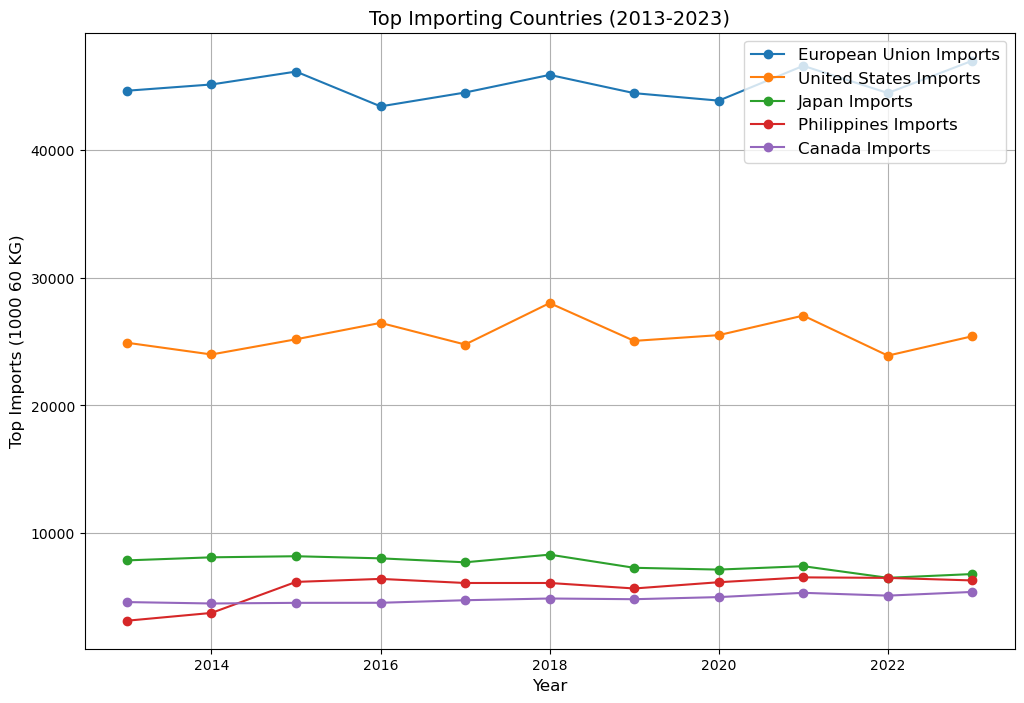

In [29]:
eu_data = new_df[new_df['Country'] == 'European Union']
us_data = new_df[new_df['Country'] == 'United States']
ja_data = new_df[new_df['Country'] == 'Japan']
ph_data = new_df[new_df['Country'] == 'Philippines']
ca_data = new_df[new_df['Country'] == 'Canada']

# Plot the data
plt.figure(figsize=(12, 8))

# Line plot for Top Importing Countries
plt.plot(eu_data['Year'], eu_data['Imports'], marker='o', label='European Union Imports')
plt.plot(us_data['Year'], us_data['Imports'], marker='o', label='United States Imports')
plt.plot(ja_data['Year'], ja_data['Imports'], marker='o', label='Japan Imports')
plt.plot(ph_data['Year'], ph_data['Imports'], marker='o', label='Philippines Imports')
plt.plot(ca_data['Year'], ca_data['Imports'], marker='o', label='Canada Imports')

# Adding titles and labels
plt.title('Top Importing Countries (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Top Imports (1000 60 KG)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
#plt.tight_layout()

#plt.xlim(2013, 2023)  # X-axis limits
#plt.ylim(0, 50000)  # Y-axis limits

# Show the plot
plt.show()


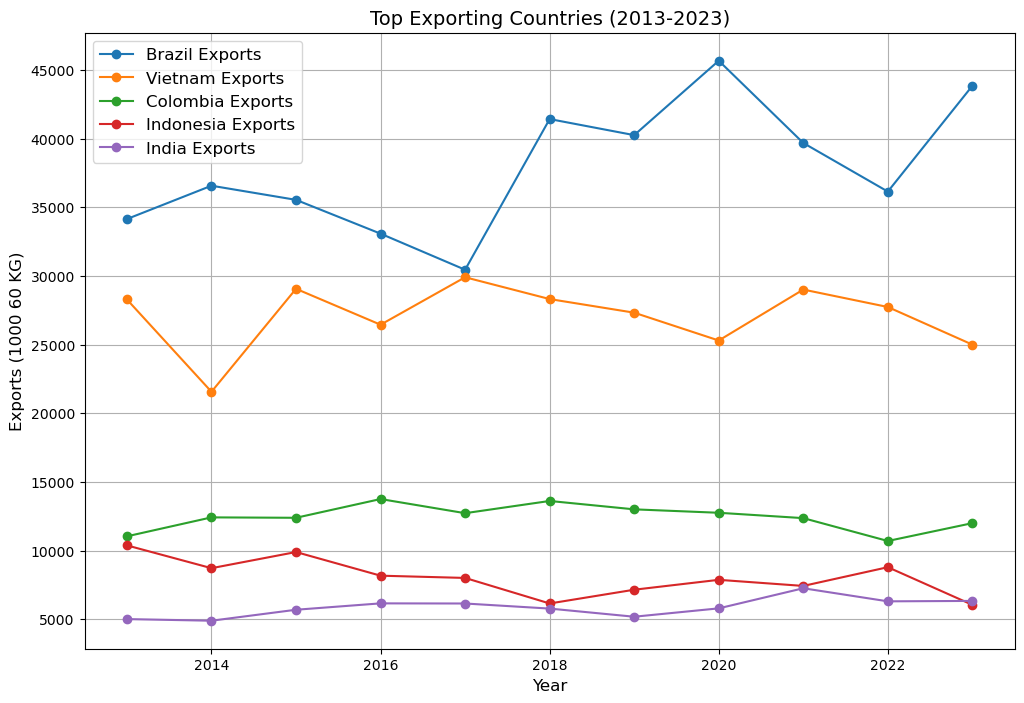

In [31]:
br_data = new_df[new_df['Country'] == 'Brazil']
viet_data = new_df[new_df['Country'] == 'Vietnam']
col_data = new_df[new_df['Country'] == 'Colombia']
indo_data = new_df[new_df['Country'] == 'Indonesia']
ind_data = new_df[new_df['Country'] == 'India']

# Plot the data
plt.figure(figsize=(12, 8))

# Line plot for Top Importing Countries
plt.plot(br_data['Year'], br_data['Exports'], marker='o', label='Brazil Exports')
plt.plot(viet_data['Year'], viet_data['Exports'], marker='o', label='Vietnam Exports')
plt.plot(col_data['Year'], col_data['Exports'], marker='o', label='Colombia Exports')
plt.plot(indo_data['Year'], indo_data['Exports'], marker='o', label='Indonesia Exports')
plt.plot(ind_data['Year'], ind_data['Exports'], marker='o', label='India Exports')

# Adding titles and labels
plt.title('Top Exporting Countries (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Exports (1000 60 KG)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
#plt.tight_layout()

#plt.xlim(2013, 2023)  # X-axis limits
#plt.ylim(0, 50000)  # Y-axis limits

# Show the plot
plt.show()




In [ ]:
stats_filtered_df.columns

In [ ]:
# Which columns we need to drop?

stats_dropped_df = stats_filtered_df[['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports','Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production']]
stats_dropped_df.head()

### Grouping countries with mean values to find top countries, and dropping unneccessary columns. 

In [ ]:
stats_grouped_df = stats_dropped_df.groupby('Country').mean().reset_index()
stats_grouped_dropped_df = stats_grouped_df.drop(columns = ['Year'])
stats_grouped_dropped_df.head()

In [ ]:
stats_grouped_dropped_df.to_csv("Avg_Import_export.csv", encoding="UTF-8", index=False, header=True)

### Top exporting countries for Bar Plot (by qualities) to show which type is predominantly exported. 

In [ ]:
stats_grouped_dropped_df.sort_values(by = ['Exports'], ascending = False)

### Top 5 exporting countries with values of 2013-2023 for dropdown button for HTML.

In [ ]:
top_5_exports = stats_filtered_df[stats_filtered_df['Country'].isin(['Brazil', 'Vietnam', 'Colombia', 'Indonesia', 'India'])]
top_5_exports.head()

In [ ]:
top_5_exports.to_csv("top_5_exports.csv", encoding="UTF-8", index=False, header=True)

### Top importing countries or consumers for Bar Plot (by qualities) to show which type is predominantly imported.

In [ ]:
stats_grouped_dropped_df.sort_values(by = ['Imports'], ascending = False)

### Top 5 importing countries with values of 2013-2023 for line graphs for dropdown button in HTML.

In [ ]:
top_5_imports = stats_filtered_df[stats_filtered_df['Country'].isin(['European Union', 'United States', 'Japan', 'Philipines', 'Canada'])]
top_5_imports.head()

In [ ]:
top_5_imports.to_csv("top_5_imports.csv", encoding="UTF-8", index=False, header=True)

In [ ]:
# Top countries (3) use sorting for bar charts
# Line charts (get top countries from stats_dropped_df)
# Consumption versus population (Scatter plott) How about quality score versus import?

# Cleaning population_data

In [ ]:
population_df.head()

In [ ]:
population_df.columns

In [ ]:
population_dropped_df = population_df[['Country', 'Population 2023']]
population_dropped_df.head()                                     

In [ ]:
population_dropped_df.to_csv("Clean_population.csv", encoding="UTF-8", index=False, header=True)

In [ ]:
population_dropped_df['Country'].count

### The imported values by country in 2023 (to calculate per person usage)

In [ ]:
export_2023_df = stats_filtered_df.loc[stats_filtered_df['Year']==2023, ['Country', 'Exports']]
export_2023_df.shape

In [ ]:
export_2023_df.head()

### The exported values by country in 2023 (to calculate per person usage)

In [ ]:
import_2023_df = stats_filtered_df.loc[stats_filtered_df['Year']==2023, ['Country', 'Imports']]
import_2023_df.shape

In [ ]:
import_2023_df.head()

### Merge population_dorpped_df with export_2023_df and import_2023_df

In [ ]:
merged_pop_export_df = pd.merge(population_dropped_df, export_2023_df, on = ['Country'], how = 'left')
clean_pop_export_df = merged_pop_export_df.dropna(how = 'any')
clean_pop_export_df

In [ ]:
merged_df = pd.merge(clean_pop_export_df, import_2023_df, on = ['Country'], how = 'left')
merged_df 

In [ ]:
merged_renamed_df = merged_df.rename(columns = {'Population 2023': 'Population'})
merged_renamed_df

### Calculate consumption of per person by countries 

In [ ]:
merged_renamed_df['Consumption per person'] = merged_renamed_df['Imports']/merged_renamed_df['Population']
merged_renamed_df

### Who is drinking more coffee???

In [ ]:
merged_renamed_df.sort_values(by = 'Consumption per person', ascending = False)

In [ ]:
merged_renamed_df.to_csv("Per_consumption.csv", encoding="UTF-8", index=False, header=True)

### Visualizing with heatmap (by qlty_renamedAll_df['Mean_overall'])

In [ ]:
qlty_renamed_cols_df.head()

In [ ]:
qlty_renamed_cols_df_copy = qlty_renamed_cols_df.copy()

In [ ]:
# Set the index to 'Country of origin' for better visualization
qlty_renamed_cols_df_copy.set_index('Country of origin', inplace=True)

# Create a heatmap for the given data without using correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(qlty_renamed_cols_df_copy, annot=True, cmap='coolwarm')
plt.title('Heatmap for Country VS quality', size=18)
plt.show()

### Merging qlty_renamed_All_df with merged_renamed_df for another heatmap for 
### correlation of quality with import/export/consumption.


In [ ]:
merged_final_heatmap_df = pd.merge(qlty_renamed_cols_df, merged_renamed_df, left_on = ['Country of origin'], right_on = ['Country'])
merged_final_heatmap_df.head()

In [ ]:
merged_final_heatmap_df.drop(['Country of origin','Country', 'Population'], axis = 1, inplace = True)
merged_final_heatmap_df.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
corr_matrix = merged_final_heatmap_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='plasma', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()